**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [3]:
### init: file path
ASSAY  = "KS91_K562_ASTARRseq"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "result.score.raw.cpm.WGS.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign and show
dat_peak_score_astarr = dat
print(dim(dat))
head(dat)

[1] 246852     15


Chrom,Start,End,Peak,Length,Input,Output,Log2FC,pLog2FC,Input_Residual,Input_Score,Output_Residual,Output_Score,Input_FPKM,Output_FPKM
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1_10015_10442,427,0.4863317,0.09736537,-2.3204599,-0.43771215,0.25149985,0.1362392,-0.1433799,0.07463616,1.1389501,0.2280219
chr1,14253,14645,chr1_14253_14645,392,0.3152472,0.27902967,-0.1760648,-0.04028420,0.19879784,0.1357280,0.1693269,0.07589325,0.8042019,0.7118104
chr1,16015,16477,chr1_16015_16477,462,0.4361424,0.15900628,-1.4557156,-0.30931046,0.08292808,0.1346040,-0.2127815,0.07435717,0.9440313,0.3441694
chr1,17237,17772,chr1_17237_17772,535,0.8007562,0.22194085,-1.8511878,-0.55942840,0.20062968,0.1357457,-0.4231641,0.07351143,1.4967405,0.4148427
chr1,28903,29613,chr1_28903_29613,710,0.7629703,0.16679463,-2.1935541,-0.59545755,-0.42906879,0.1296375,-1.1335228,0.07065579,1.0746061,0.2349220
chr1,30803,31072,chr1_30803_31072,269,0.2774187,0.21678565,-0.3557958,-0.07015643,0.57699942,0.1393966,0.5676036,0.07749432,1.0312963,0.8058946


## Set factor for plotting order of OCRs

In [4]:
dat = dat_peak_score_astarr
dat = dat %>% arrange(Input_FPKM)

PEAKS = dat$Peak
print(dim(dat))
head(dat)

[1] 246852     15


Chrom,Start,End,Peak,Length,Input,Output,Log2FC,pLog2FC,Input_Residual,Input_Score,Output_Residual,Output_Score,Input_FPKM,Output_FPKM
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr21,8396525,8397035,chr21_8396525_8397035,510,0.0003692464,0.000000000,-Inf,-0.0005326117,-0.5151983,0.12880198,-0.5515032,0.07299551,0.0007240126,0.000000000
chr21,8219783,8221061,chr21_8219783_8221061,1278,0.0010822728,0.008433573,2.962080,0.0105555090,-3.1121361,0.10361091,-3.4185163,0.06147013,0.0008468489,0.006599040
chr18,79357349,79358369,chr18_79357349_79358369,1020,0.1607016195,0.002730519,-5.879066,-0.2110632099,-2.0798685,0.11362422,-2.4582490,0.06533040,0.1575506073,0.002676979
chr15,101754400,101755262,chr15_101754400_101755262,862,0.1390983940,0.002730519,-5.670787,-0.1839584331,-1.5670591,0.11859862,-1.8666857,0.06770848,0.1613670464,0.003167655
chr17,43271129,43272843,chr17_43271129_43272843,1714,0.2798863020,0.801821605,1.518440,0.4934405248,-4.3080402,0.09201029,-4.2575433,0.05809724,0.1632942252,0.467807238
chr5,260684,262125,chr5_260684_262125,1441,0.2694426176,0.020562375,-3.711899,-0.3148308229,-3.3951001,0.10086608,-4.0166711,0.05906555,0.1869830795,0.014269517


## Set score for plotting: STARR/MPRA & CRISPR

In [5]:
dat = dat_peak_score_astarr
dat = dat %>% 
    dplyr::mutate(
        Peak  = factor(Peak,  levels=PEAKS),
        Score = Input_FPKM
    )

dat_score_atac = dat
print(dim(dat))
head(dat)

[1] 246852     16


Chrom,Start,End,Peak,Length,Input,Output,Log2FC,pLog2FC,Input_Residual,Input_Score,Output_Residual,Output_Score,Input_FPKM,Output_FPKM,Score
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1_10015_10442,427,0.4863317,0.09736537,-2.3204599,-0.43771215,0.25149985,0.1362392,-0.1433799,0.07463616,1.1389501,0.2280219,1.1389501
chr1,14253,14645,chr1_14253_14645,392,0.3152472,0.27902967,-0.1760648,-0.04028420,0.19879784,0.1357280,0.1693269,0.07589325,0.8042019,0.7118104,0.8042019
chr1,16015,16477,chr1_16015_16477,462,0.4361424,0.15900628,-1.4557156,-0.30931046,0.08292808,0.1346040,-0.2127815,0.07435717,0.9440313,0.3441694,0.9440313
chr1,17237,17772,chr1_17237_17772,535,0.8007562,0.22194085,-1.8511878,-0.55942840,0.20062968,0.1357457,-0.4231641,0.07351143,1.4967405,0.4148427,1.4967405
chr1,28903,29613,chr1_28903_29613,710,0.7629703,0.16679463,-2.1935541,-0.59545755,-0.42906879,0.1296375,-1.1335228,0.07065579,1.0746061,0.2349220,1.0746061
chr1,30803,31072,chr1_30803_31072,269,0.2774187,0.21678565,-0.3557958,-0.07015643,0.57699942,0.1393966,0.5676036,0.07749432,1.0312963,0.8058946,1.0312963


In [6]:
summary(dat_score_atac$Score)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00072  0.64626  0.79821  1.46021  1.22449 39.91072 

## Plot: STARR/MPRA & CRISPR

In [7]:
THEME_TEXT = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "bold", size = 17)
    #plot.title = element_text(face = "plain", size = 17)
)

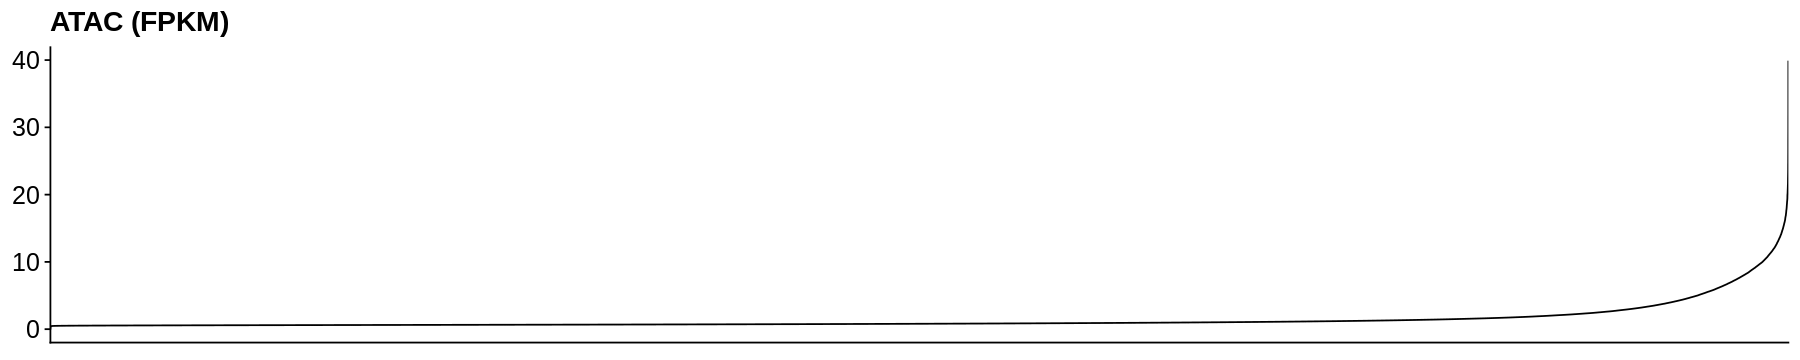

In [8]:
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "ATAC (FPKM)"
dat = dat_score_atac

gpt = ggplot(dat, aes(x=Peak, y=Score, group=1)) +
    geom_line() +
    labs(title = txt) +
    theme_cowplot() + 
    theme_text +
    theme_legend

gpt_score_atac = gpt

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [9]:
dat_score = dat_score_atac

## Import annotation: Enhancer

In [10]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.crispri_hcrff_casa.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Label = "CRISPR_CASA")

dat_peak_annot_casa = dat
print(dim(dat))
head(dat)

[1] 57  5


Peak,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<dbl>,<chr>
chr11_33868682_33871379,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33880631_33881416,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33881831_33882405,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33936760_33937819,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33941500_33942221,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33944510_33945297,CRISPRi_HCRFF,CRISPR_CASA,3,CAPRIN1|CAT|LMO2


In [11]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.enhancer_junke_peak_starr.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_enh = dat
print(dim(dat))
head(dat)

[1] 29012     5


Peak,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<dbl>,<chr>
chr10_100009096_100010466,Enhancer,Enhancer_STARR,2,WSTARR|WSTARR
chr10_100185017_100187275,Enhancer,Enhancer_STARR,1,WSTARR
chr10_100228452_100230090,Enhancer,Enhancer_STARR,1,ASTARR
chr10_100267066_100268374,Enhancer,Enhancer_STARR,2,ASTARR|WSTARR
chr10_100285974_100287341,Enhancer,Enhancer_STARR,2,WSTARR|WSTARR
chr10_100346328_100347693,Enhancer,Enhancer_STARR,1,WSTARR


In [12]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.enhancer_zscore_junke_peak_starr.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Label = "Enhancer_STARR_ZScore")

dat_peak_annot_enh_zscore = dat
print(dim(dat))
head(dat)

[1] 14856     5


Peak,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<dbl>,<chr>
chr10_100185017_100187275,Enhancer_ZScore,Enhancer_STARR_ZScore,1,WSTARR
chr10_100346328_100347693,Enhancer_ZScore,Enhancer_STARR_ZScore,2,WSTARR|WSTARR
chr10_100373060_100374238,Enhancer_ZScore,Enhancer_STARR_ZScore,2,WSTARR|WSTARR
chr10_100528900_100530538,Enhancer_ZScore,Enhancer_STARR_ZScore,1,WSTARR
chr10_100535377_100536237,Enhancer_ZScore,Enhancer_STARR_ZScore,1,WSTARR
chr10_100912166_100913618,Enhancer_ZScore,Enhancer_STARR_ZScore,1,WSTARR


In [13]:
###
#dat = bind_rows(dat_peak_annot_casa, dat_peak_annot_enh, dat_peak_annot_enh_zscore)
dat = bind_rows(dat_peak_annot_enh, dat_peak_annot_enh_zscore)
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_score
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_enhancer = dat
print(dim(dat))
head(dat)

[1] 246852      3
[1] 493704      3


Peak,Label,Value
<fct>,<chr>,<chr>
chr1_10015_10442,Enhancer_STARR,0
chr1_14253_14645,Enhancer_STARR,0
chr1_16015_16477,Enhancer_STARR,0
chr1_17237_17772,Enhancer_STARR,0
chr1_28903_29613,Enhancer_STARR,0
chr1_30803_31072,Enhancer_STARR,0


In [14]:
table(dat$Label, dat$Value)

                       
                             0      1
  Enhancer_STARR        217840  29012
  Enhancer_STARR_ZScore 231996  14856

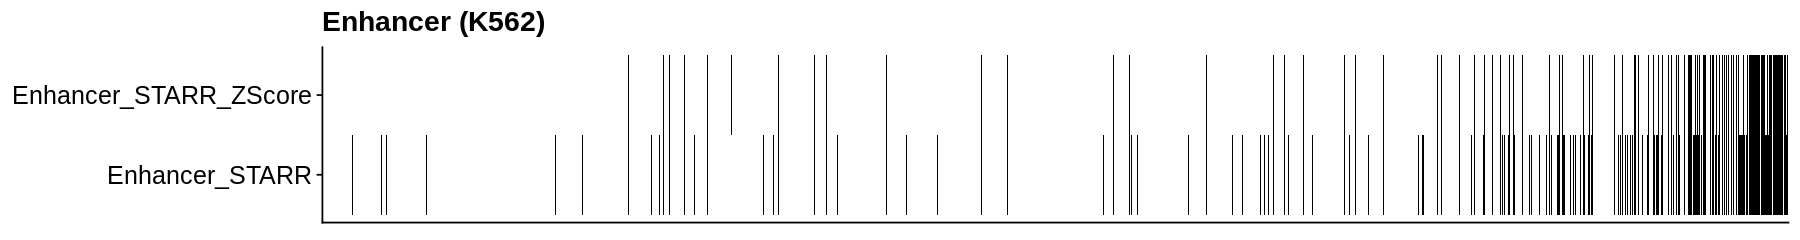

In [15]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "Enhancer (K562)"
dat = dat_annot_enhancer

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_enhancer = gpt
options(repr.plot.height=2, repr.plot.width=15)
print(gpt)

## Import annotation: TSS

In [16]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.tss_pol2.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_tss_pol2 = dat
print(dim(dat))
head(dat)

[1] 15191     4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,TSS_POL2,TSS,1
chr10_100185017_100187275,TSS_POL2,TSS,1
chr10_100228452_100230090,TSS_POL2,TSS,1
chr10_100267066_100268374,TSS_POL2,TSS,1
chr10_100285974_100287341,TSS_POL2,TSS,1
chr10_100346328_100347693,TSS_POL2,TSS,1


In [17]:
###
dat = dat_peak_annot_tss_pol2
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_score
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_tss_pol2 = dat
print(dim(dat))
head(dat)

[1] 246852      2
[1] 246852      3


Peak,Label,Value
<fct>,<chr>,<chr>
chr1_10015_10442,TSS,0
chr1_14253_14645,TSS,0
chr1_16015_16477,TSS,0
chr1_17237_17772,TSS,1
chr1_28903_29613,TSS,1
chr1_30803_31072,TSS,0


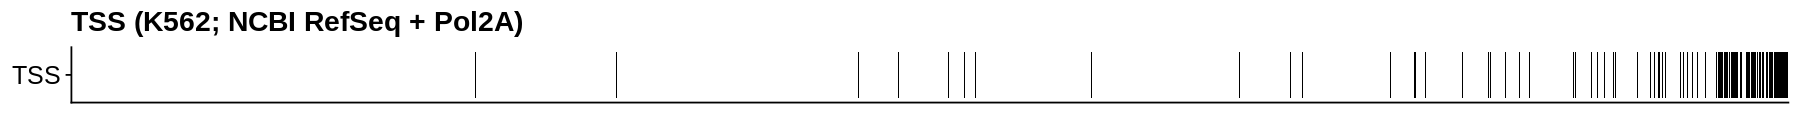

In [18]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "TSS (K562; NCBI RefSeq + Pol2A)"
dat = dat_annot_tss_pol2

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_tss_pol2 = gpt
options(repr.plot.height=1, repr.plot.width=15)
print(gpt)

## Import annotation: ChromHMM

In [19]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.chromHMM.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_chromhmm = dat
print(dim(dat))
head(dat)

[1] 343446      4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ChromHMM,TssFlnk,3
chr10_100009096_100010466,ChromHMM,TssFlnkD,2
chr10_100020710_100021134,ChromHMM,Biv,1
chr10_100020710_100021134,ChromHMM,ReprPC,1
chr10_1000372_1000820,ChromHMM,Tx,1
chr10_100045961_100046653,ChromHMM,Quies,1


In [20]:
###
dat = dat_peak_annot_chromhmm
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_score
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_chromhmm = dat
print(dim(dat))
head(dat)

[1] 246852     16
[1] 3702780       3


Peak,Label,Value
<fct>,<chr>,<chr>
chr1_10015_10442,Biv,0
chr1_14253_14645,Biv,0
chr1_16015_16477,Biv,0
chr1_17237_17772,Biv,0
chr1_28903_29613,Biv,0
chr1_30803_31072,Biv,0


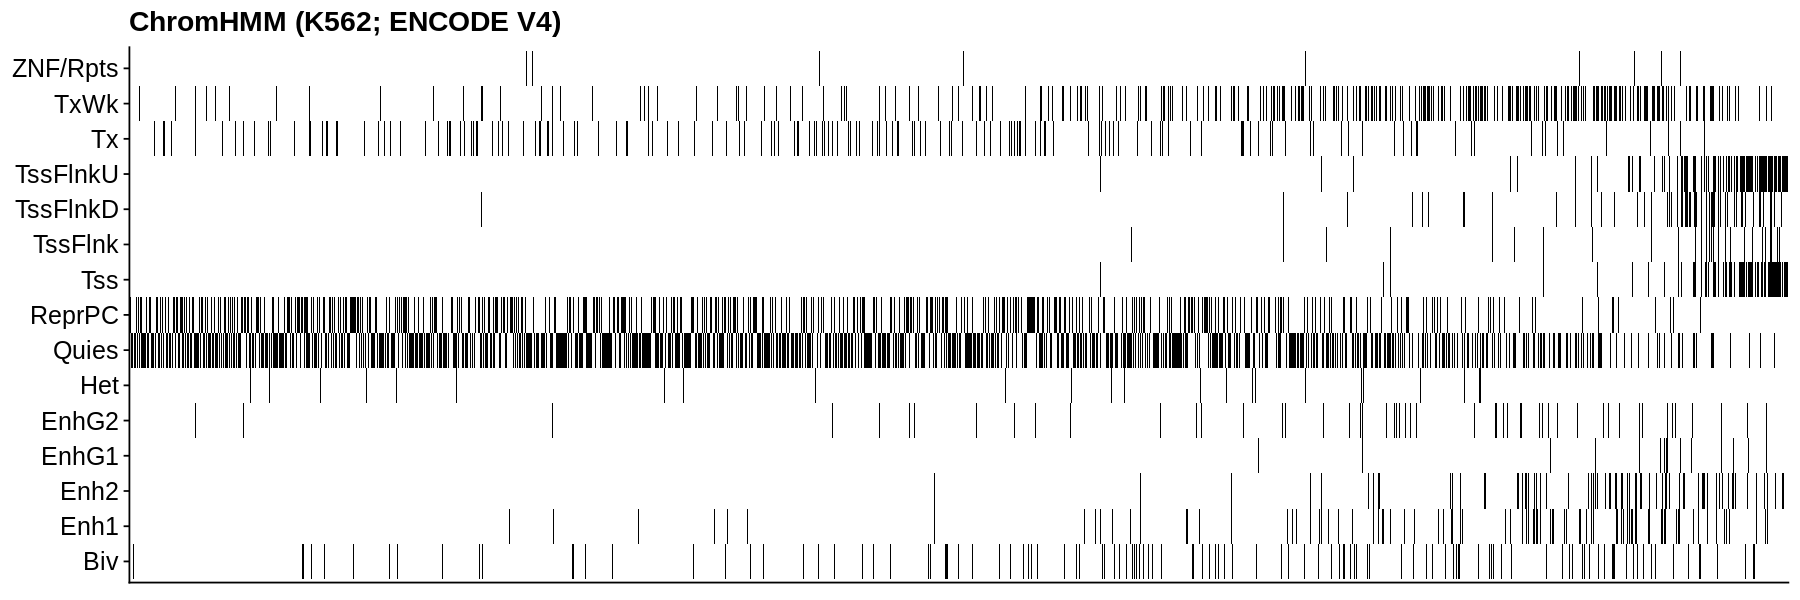

In [21]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "ChromHMM (K562; ENCODE V4)"
dat = dat_annot_chromhmm

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_chromhmm = gpt
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

## Import annotation: cCREs

In [22]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.ccre_v4.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_ccre = dat
print(dim(dat))
head(dat)

[1] 277309      4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ccre_v4,CA-H3K4me3,2
chr10_100009096_100010466,ccre_v4,Low-DNase,1
chr10_100009096_100010466,ccre_v4,PLS,1
chr10_100009096_100010466,ccre_v4,pELS,1
chr10_100020710_100021134,ccre_v4,Low-DNase,2
chr10_100045961_100046653,ccre_v4,CA-CTCF,1


In [23]:
###
dat = dat_peak_annot_ccre
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_score
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_ccre = dat
print(dim(dat))
head(dat)

[1] 246852      9
[1] 1974816       3


Peak,Label,Value
<fct>,<chr>,<chr>
chr1_10015_10442,CA-CTCF,0
chr1_14253_14645,CA-CTCF,0
chr1_16015_16477,CA-CTCF,0
chr1_17237_17772,CA-CTCF,0
chr1_28903_29613,CA-CTCF,0
chr1_30803_31072,CA-CTCF,0


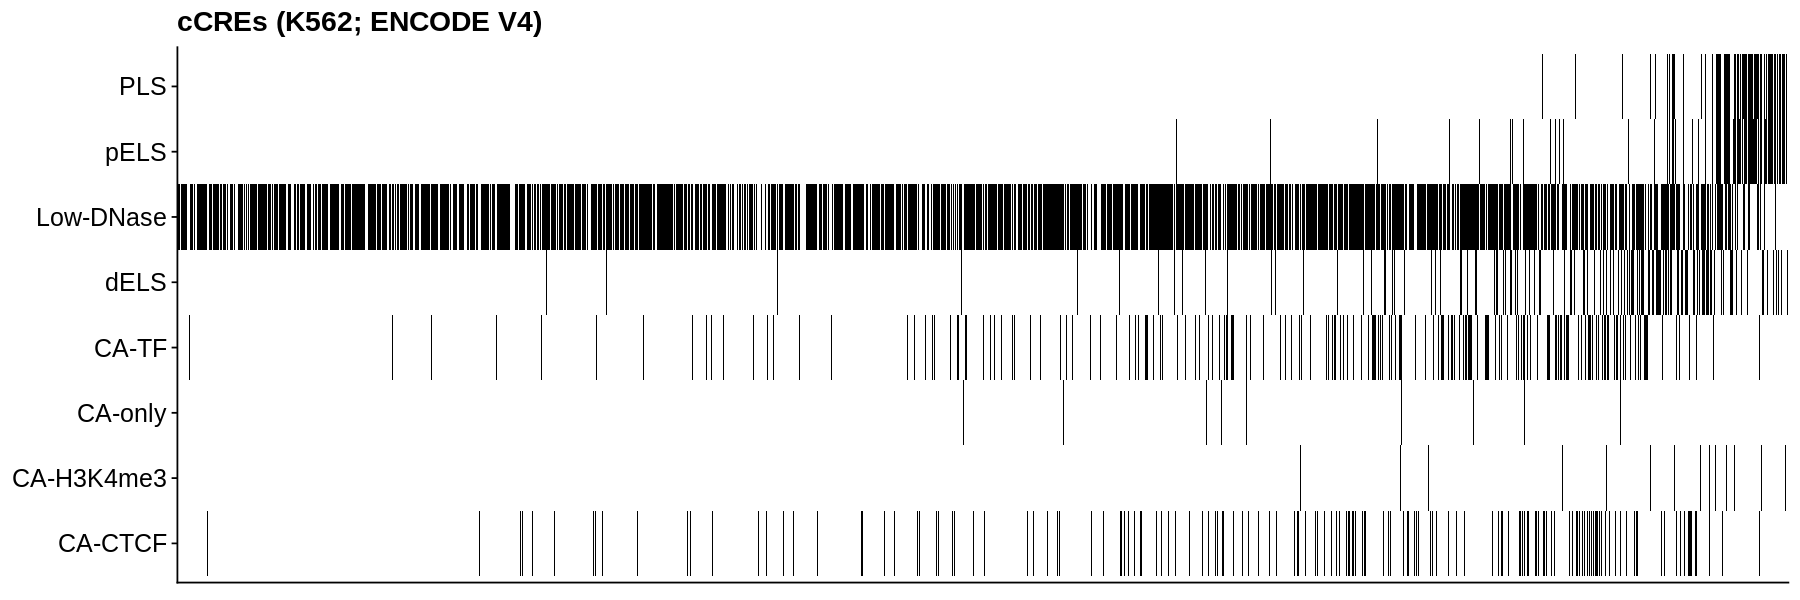

In [24]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "cCREs (K562; ENCODE V4)"
dat = dat_annot_ccre

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_ccre = gpt
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

## Import annotation: TF subset

In [25]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.chipseq_tf_subset.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_chipseq_tf_subset = dat
print(dim(dat))
head(dat)

[1] 270491      4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ChIPseq_TF,YY1,1
chr10_100185017_100187275,ChIPseq_TF,YY1,1
chr10_100228452_100230090,ChIPseq_TF,YY1,1
chr10_100267066_100268374,ChIPseq_TF,YY1,1
chr10_100285974_100287341,ChIPseq_TF,YY1,2
chr10_100346328_100347693,ChIPseq_TF,YY1,1


In [26]:
###
dat = dat_peak_annot_chipseq_tf_subset
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_score
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_chipseq_tf_subset = dat
print(dim(dat))
head(dat)

[1] 246852     17
[1] 3949632       3


Peak,Label,Value
<fct>,<chr>,<chr>
chr1_10015_10442,ATF1,0
chr1_14253_14645,ATF1,0
chr1_16015_16477,ATF1,0
chr1_17237_17772,ATF1,0
chr1_28903_29613,ATF1,0
chr1_30803_31072,ATF1,0


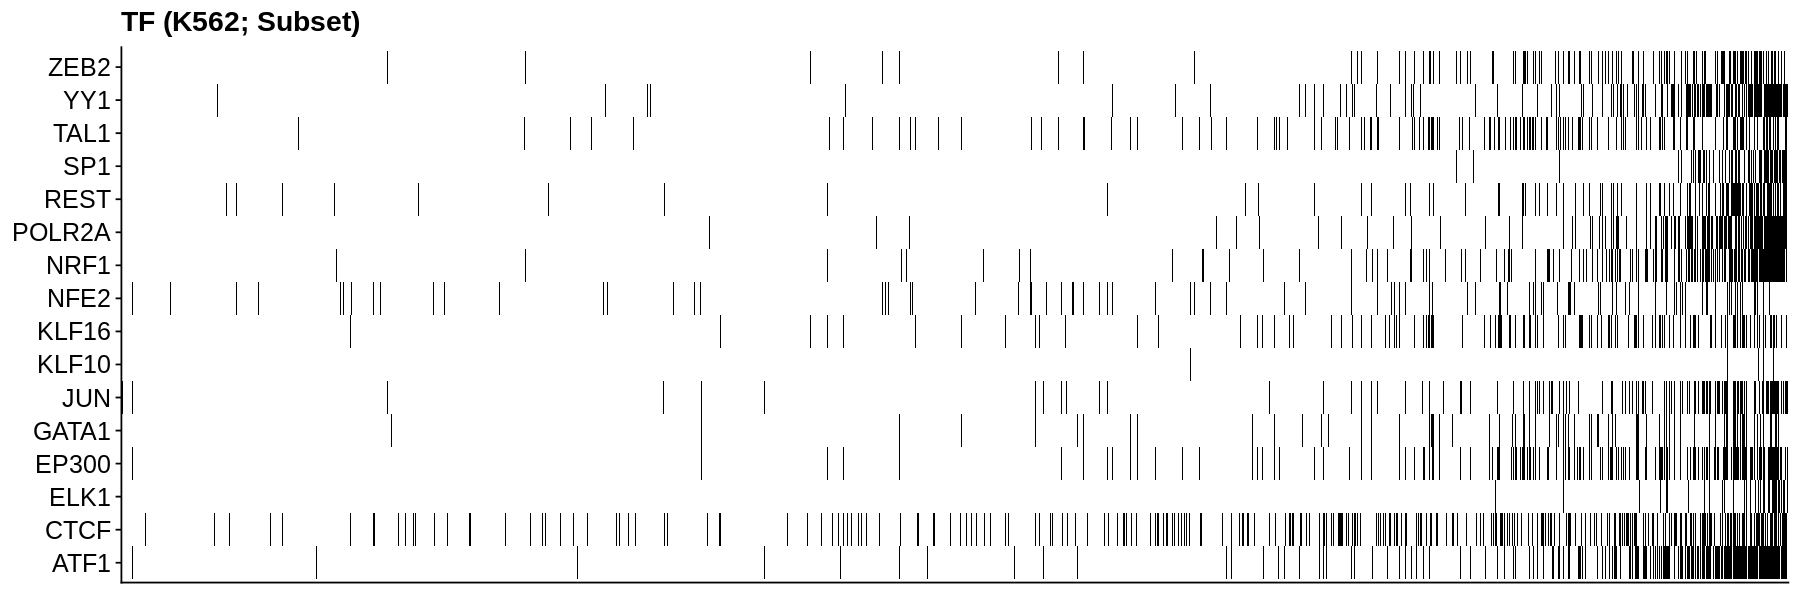

In [27]:
theme_fill = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")
#theme_legend = theme(
#    legend.position = "bottom", 
#    legend.key.size = unit(1, 'cm'),
#    legend.title = element_text(size=20),
#    legend.text = element_text(size=10))

txt = "TF (K562; Subset)"
dat = dat_annot_chipseq_tf_subset

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_chipseq_tf_subset = gpt
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

## Import annotation: TF

In [28]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.chipseq_tf.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_chipseq_tf = dat
print(dim(dat))
head(dat)

[1] 5716412       4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100045961_100046653,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100228452_100230090,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100240591_100241246,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100338359_100339077,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100342247_100342824,ChIPseq_TF,CTCF_ENCFF769AUF,1


In [29]:
dat = dat_peak_annot_chipseq_tf
vec = unique(dat$Label)
print(length(vec))

set.seed(123)
vec = sample(vec, size = 100)
print(length(vec))

dat = dat %>% dplyr::filter(Label %in% vec)
dat_peak_annot_chipseq_tf_sample = dat
print(dim(dat))
head(dat)

[1] 733
[1] 100
[1] 824104      4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_14184978_14186500,ChIPseq_TF,CREBBP_ENCFF532VPN,1
chr10_3942465_3944258,ChIPseq_TF,CREBBP_ENCFF532VPN,1
chr10_69315429_69316171,ChIPseq_TF,CREBBP_ENCFF532VPN,1
chr10_73625148_73627682,ChIPseq_TF,CREBBP_ENCFF532VPN,1
chr11_2652906_2653382,ChIPseq_TF,CREBBP_ENCFF532VPN,1
chr11_329034_329890,ChIPseq_TF,CREBBP_ENCFF532VPN,1


In [30]:
###
dat = dat_peak_annot_chipseq_tf_sample
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_score
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_chipseq_tf = dat
print(dim(dat))
head(dat)

[1] 246852    101
[1] 24685200        3


Peak,Label,Value
<fct>,<chr>,<chr>
chr1_10015_10442,ARID3B_ENCFF270TSN,0
chr1_14253_14645,ARID3B_ENCFF270TSN,0
chr1_16015_16477,ARID3B_ENCFF270TSN,0
chr1_17237_17772,ARID3B_ENCFF270TSN,0
chr1_28903_29613,ARID3B_ENCFF270TSN,0
chr1_30803_31072,ARID3B_ENCFF270TSN,0


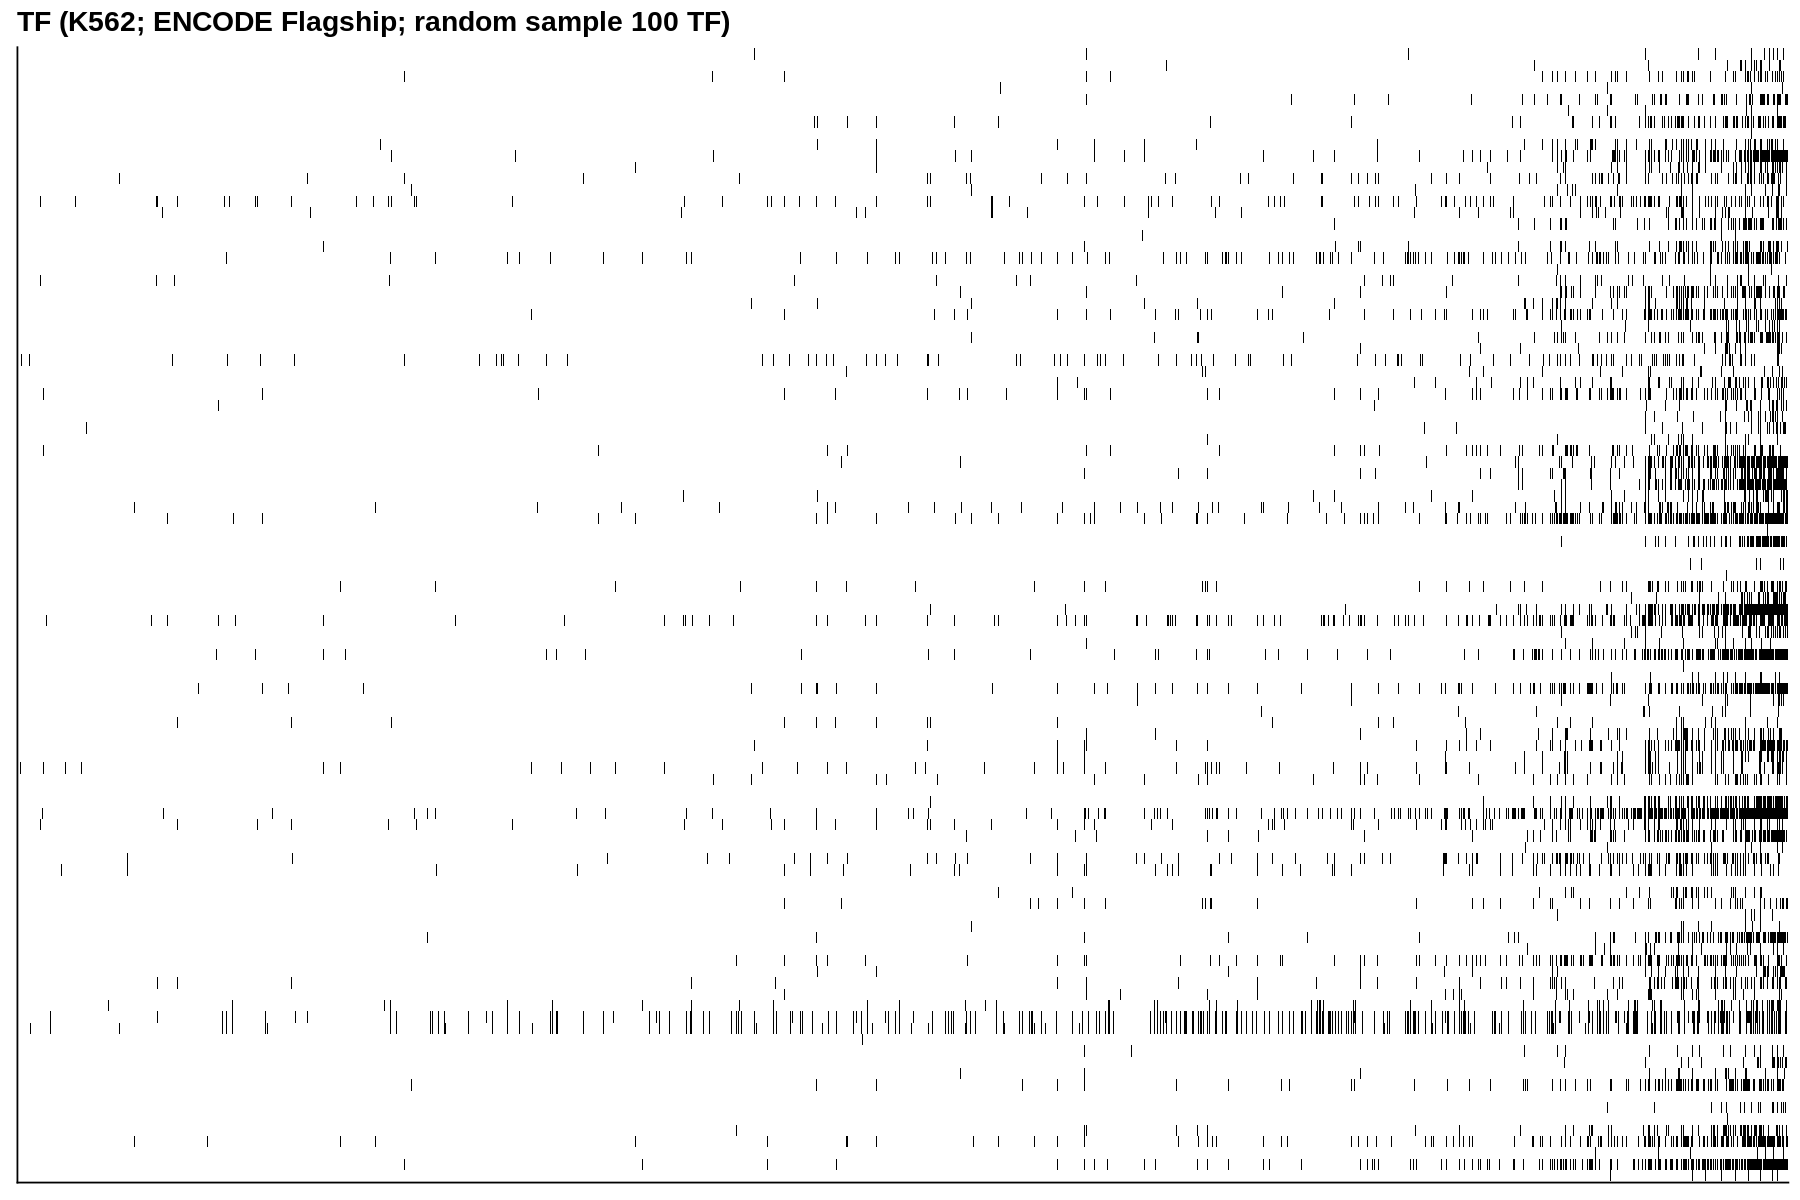

In [31]:
theme_fill = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "bold", size = 17)
)
theme_legend = theme(legend.position = "none")

txt = "TF (K562; ENCODE Flagship; random sample 100 TF)"
dat = dat_annot_chipseq_tf

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_chipseq_tf = gpt
options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

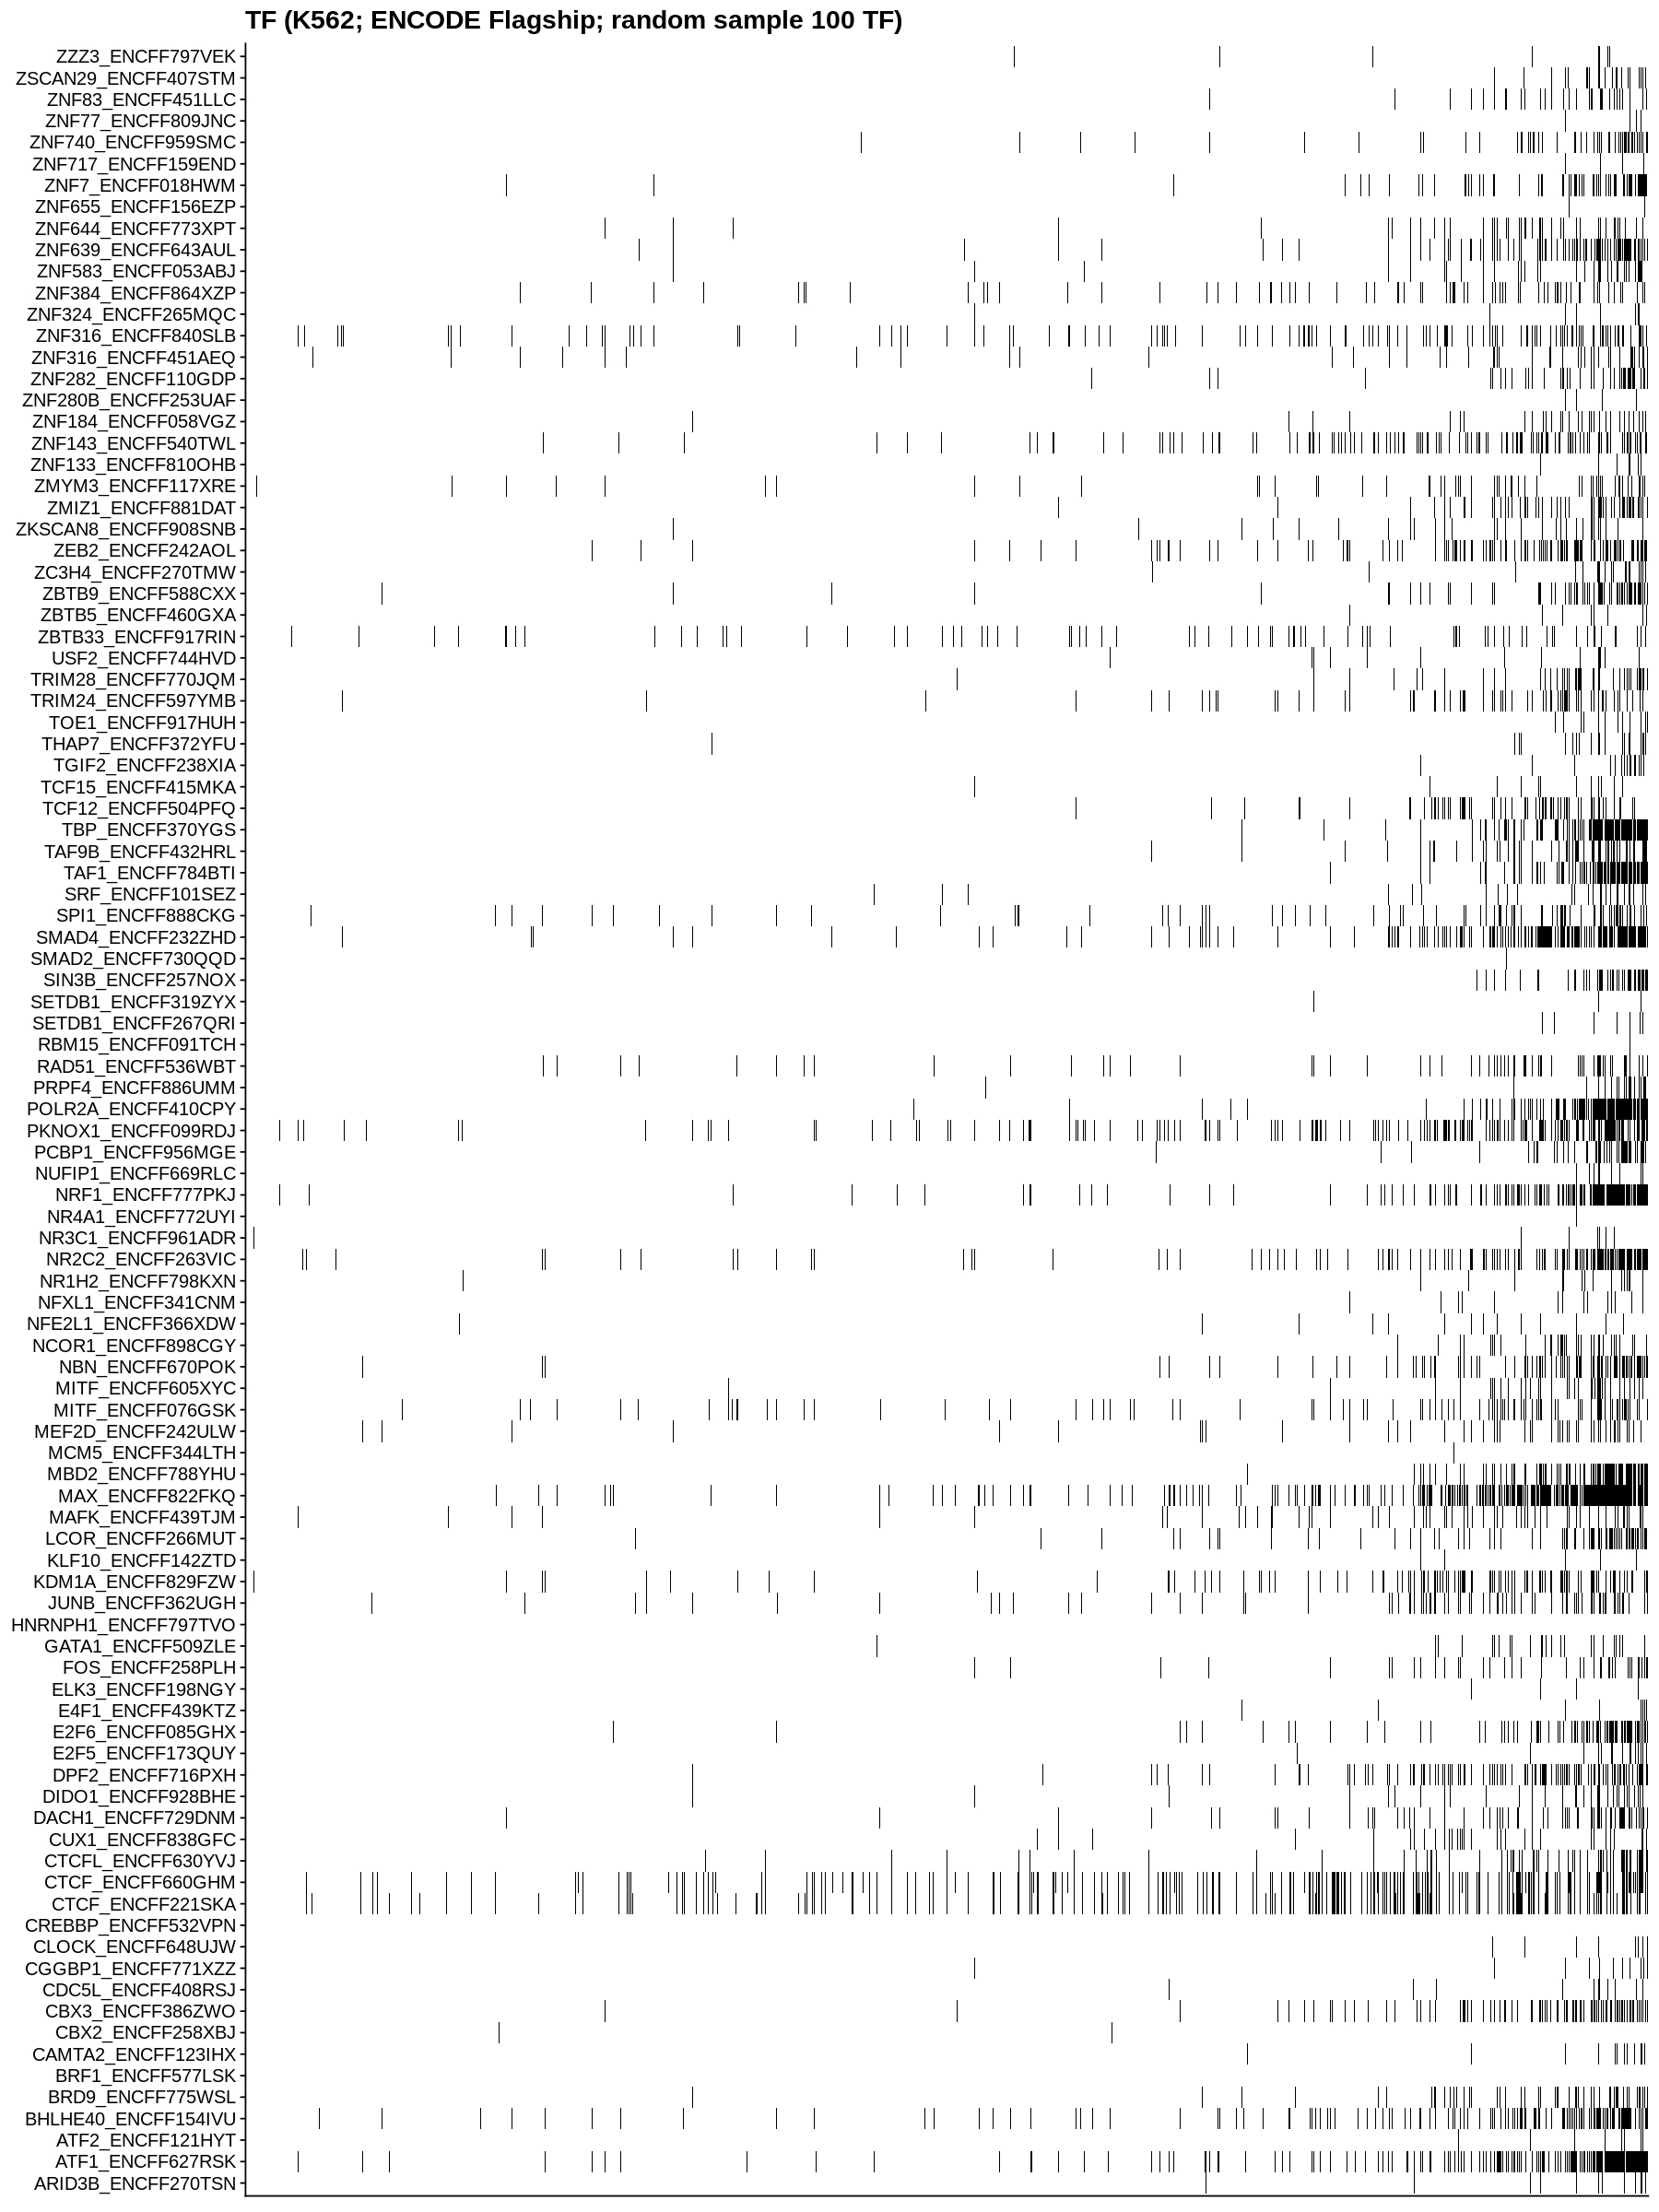

In [34]:
theme_fill = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text = theme(
    axis.ticks.x = element_blank(),
    #axis.ticks.y = element_blank(),
    axis.text.x  = element_blank(),
    #axis.text.y  = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "bold", size = 17)
)
theme_legend = theme(legend.position = "none")

txt = "TF (K562; ENCODE Flagship; random sample 100 TF)"
dat = dat_annot_chipseq_tf

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

options(repr.plot.height=20, repr.plot.width=15)
print(gpt)

## Final plot

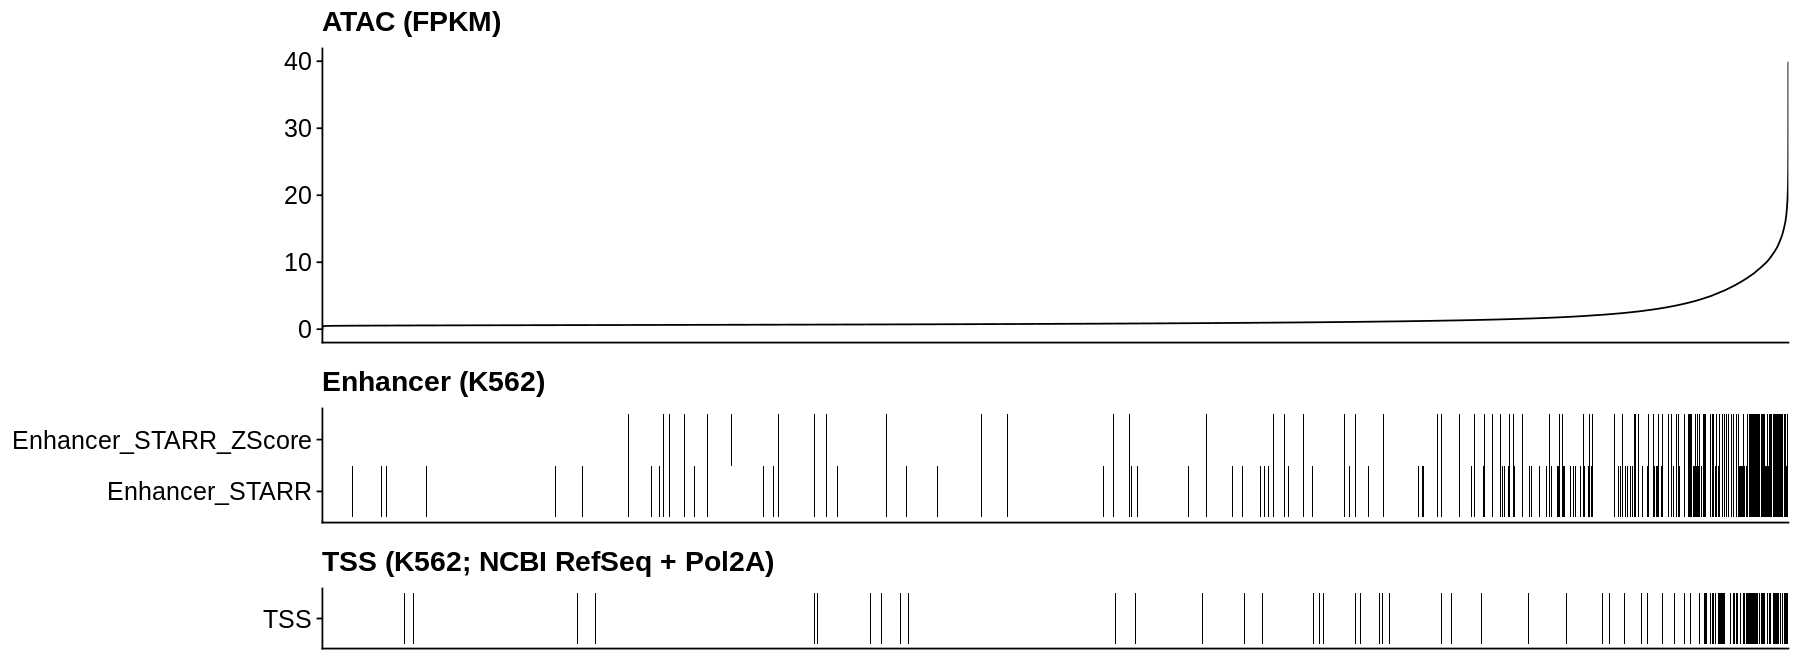

In [35]:
rel_heights = c(2, 1, 0.7)
lst_gpt = list(
    gpt_score_atac,
    gpt_annot_enhancer,
    gpt_annot_tss_pol2
) 

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights)

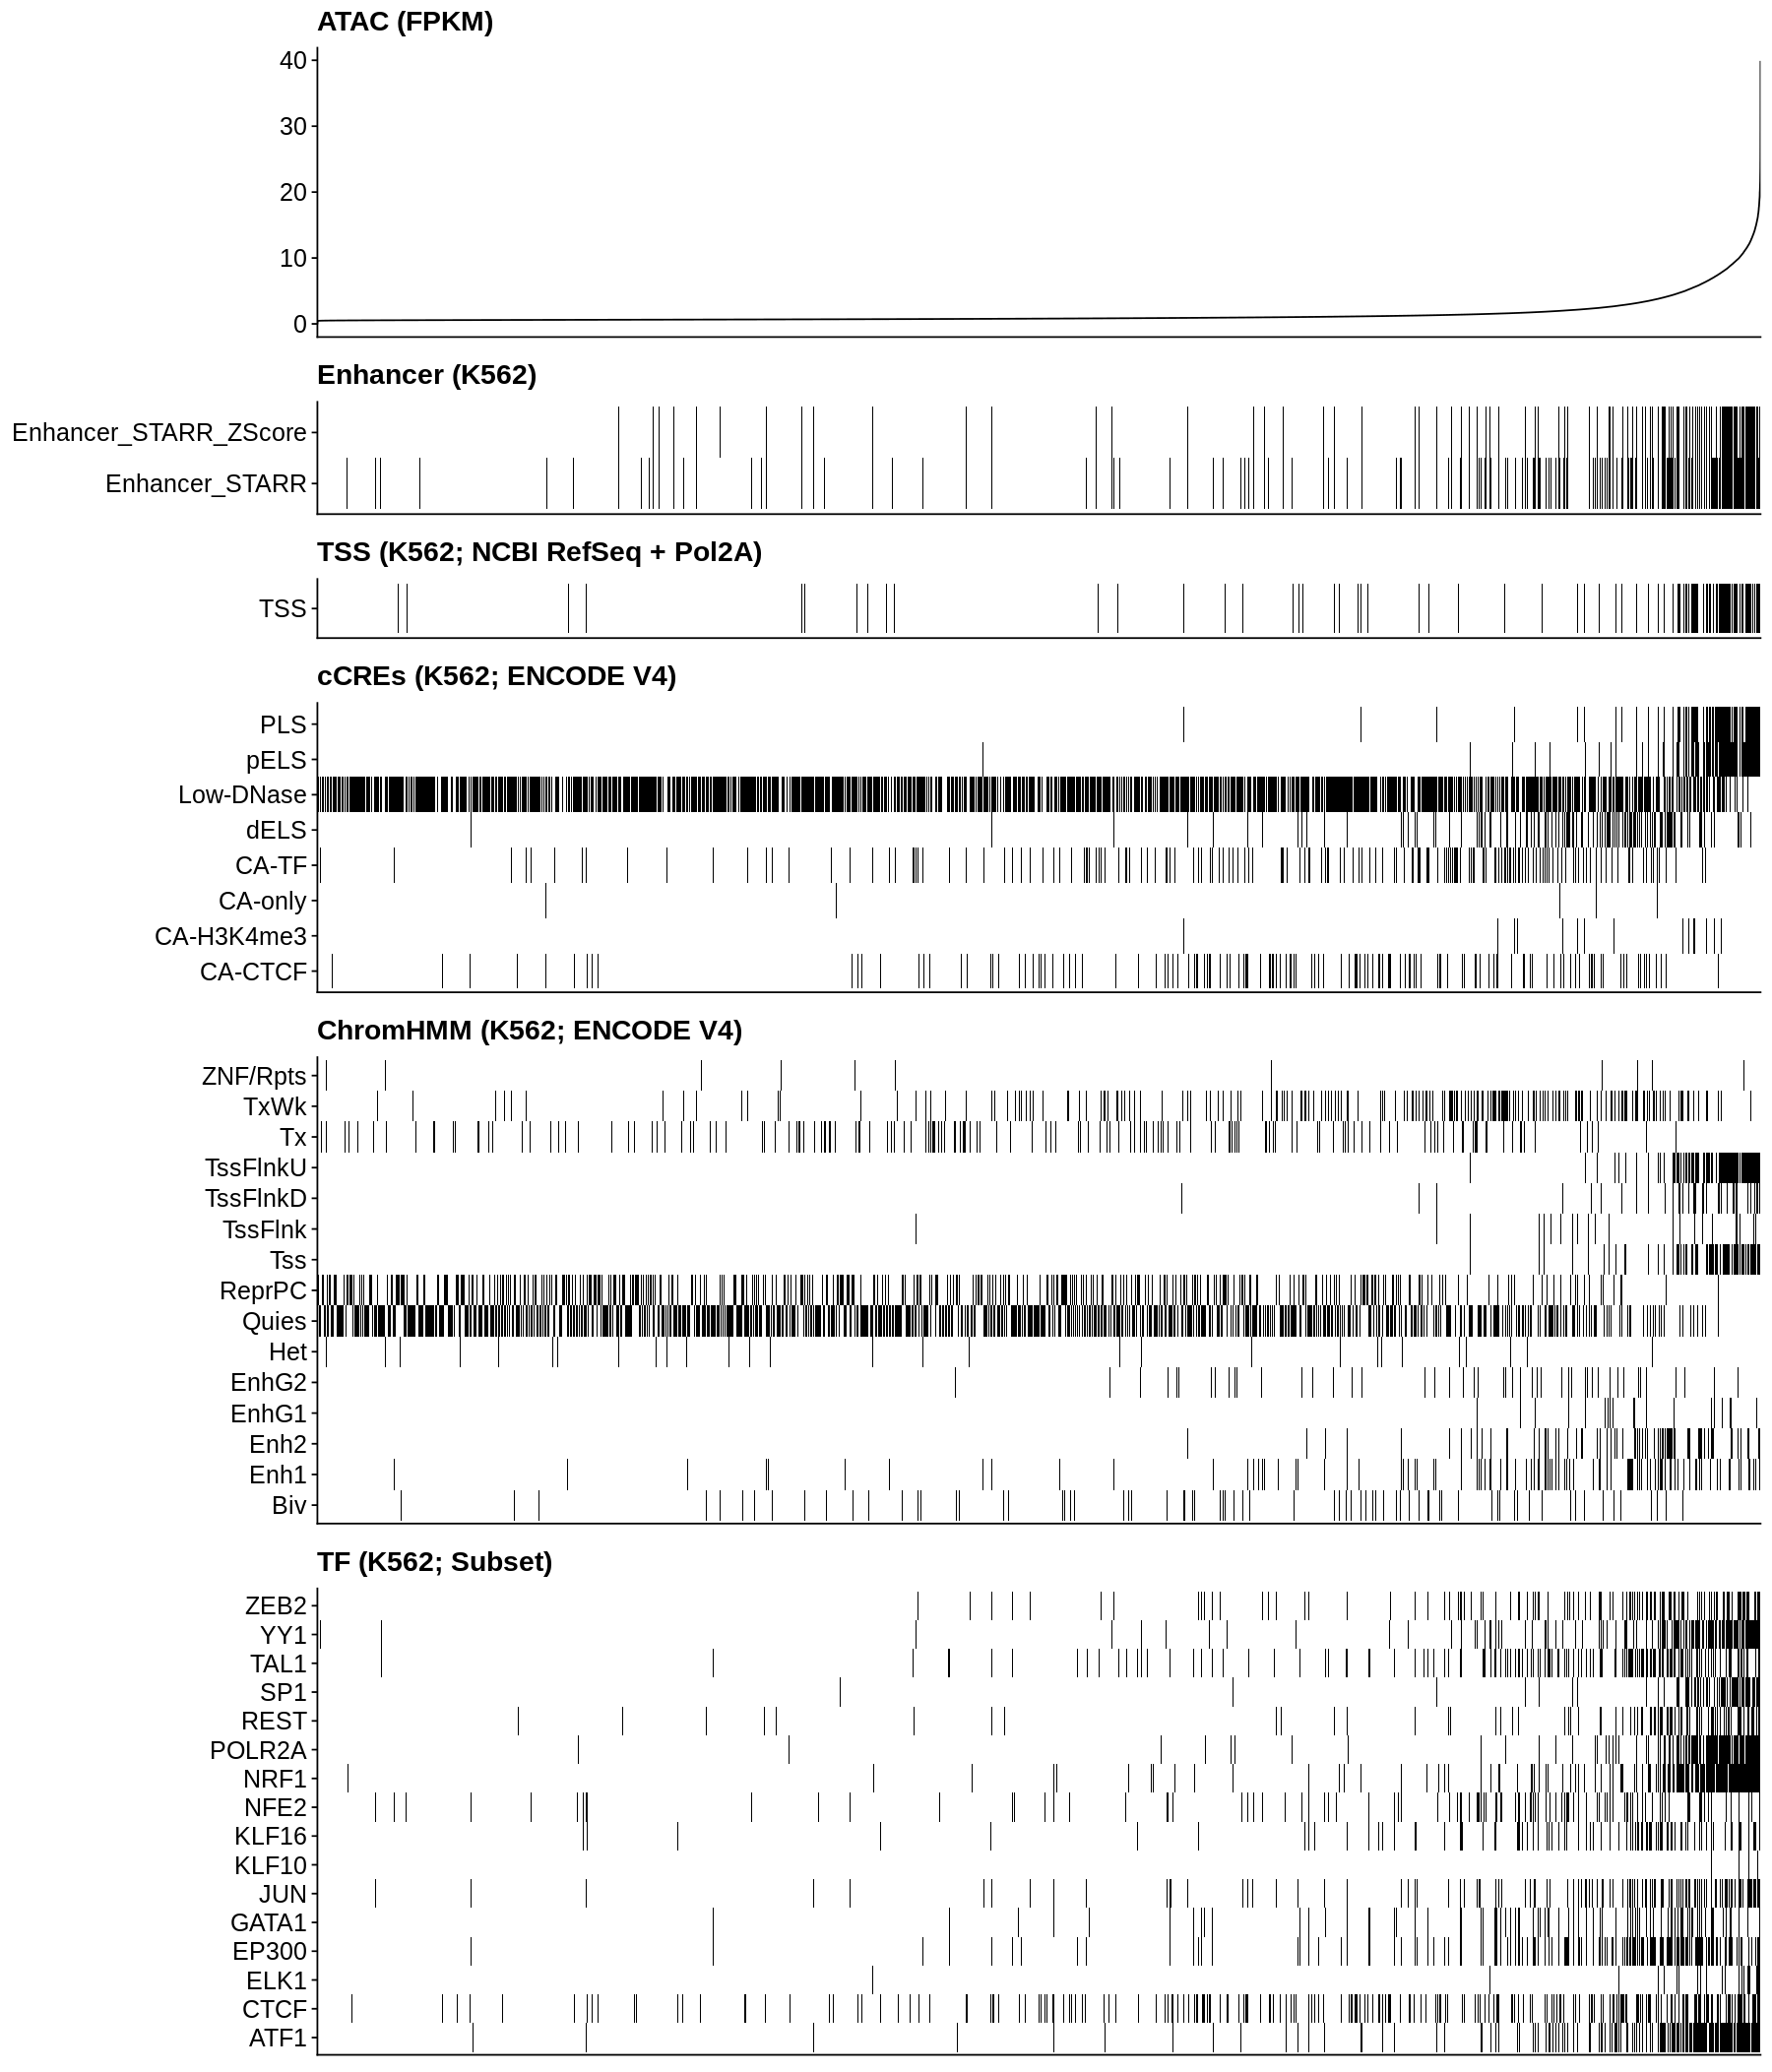

In [36]:
rel_heights = c(2, 1, 0.7, 2, 3, 3)
lst_gpt = list(
    gpt_score_atac,
    gpt_annot_enhancer,
    gpt_annot_tss_pol2,
    gpt_annot_ccre,
    gpt_annot_chromhmm,
    gpt_annot_chipseq_tf_subset
) 

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights)